# Task 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential


Reading the image dataset :-

In [2]:
test_dataset_path = "Group_3/test"
val_dataset_path = "Group_3/val"
train_dataset_path = "Group_3/train"


batch_size = 11385
data_with_aug = ImageDataGenerator(rescale=1./255)


train = data_with_aug.flow_from_directory(train_dataset_path,
                                          batch_size = batch_size,
                                          target_size=(28, 28),
                                        shuffle=None)

val = data_with_aug.flow_from_directory(val_dataset_path,
                                        batch_size = batch_size,
                                        target_size=(28, 28),shuffle=None)
                                          
test = data_with_aug.flow_from_directory(test_dataset_path,
                                         batch_size = batch_size,
                                        target_size=(28, 28),shuffle=None)
                                                                               
X_train = train[0][0]
X_val = val[0][0]
X_test = test[0][0]
print(X_test.shape)
X_val.shape

Found 11385 images belonging to 5 classes.
Found 3795 images belonging to 5 classes.
Found 3795 images belonging to 5 classes.
(3795, 28, 28, 3)


(3795, 28, 28, 3)

Viewing the image :-

(-0.5, 27.5, 27.5, -0.5)

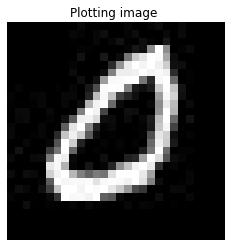

In [3]:
img = X_val[0]
plt.imshow(img)
#plt.suptitle("Train Image",fontsize=20)
plt.title("Plotting image ")
plt.axis('off')

In [4]:
def One_hot(n):
    y= [[1,0,0,0,0] for i in range(n)]
    y.extend([[0,1,0,0,0] for i in range(n)])
    y.extend([[0,0,1,0,0] for i in range(n)])
    y.extend([[0,0,0,1,0] for i in range(n)])
    y.extend([[0,0,0,0,1] for i in range(n)])
    y = np.array(y)
    return y
Y_train = One_hot(2277)
Y_val = One_hot(759)
Y_test=One_hot(759)

Flattening the dataset :-

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28*28*3)
X_val_flattened = X_val.reshape(len(X_val), 28*28*3)
X_test_flattened = X_test.reshape(len(X_test), 28*28*3)

In [6]:
loss = []
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        loss.append(logs.get('loss'))
        if epoch > 1:
            if abs(loss[epoch -1] - loss[epoch]) < THRESHOLD:
                print("\nLoss Difference : ",loss[epoch -1] - loss[epoch])   
                self.model.stop_training = True

callbacks = myCallback()
THRESHOLD = 10e-4


# Building the model with SGD :-

In [7]:
opt = SGD(learning_rate=0.001)
model = Sequential()
model.add(Dense(64,activation="relu",input_shape=(28*28*3,)))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(5,activation="sigmoid"))
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train_flattened,Y_train,validation_data=(X_val_flattened,Y_val),callbacks = [callbacks],epochs=50,batch_size=1)


Epoch 1/50
11385/11385 [==============================] - 45s 4ms/step - loss: 0.3104 - accuracy: 0.9120 - val_loss: 0.1500 - val_accuracy: 0.9528
Epoch 2/50
11385/11385 [==============================] - 43s 4ms/step - loss: 0.1261 - accuracy: 0.9601 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 3/50
11385/11385 [==============================] - 46s 4ms/step - loss: 0.0934 - accuracy: 0.9719 - val_loss: 0.0944 - val_accuracy: 0.9694
Epoch 4/50
11385/11385 [==============================] - 46s 4ms/step - loss: 0.0721 - accuracy: 0.9764 - val_loss: 0.0776 - val_accuracy: 0.9734
Epoch 5/50
11385/11385 [==============================] - 45s 4ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0703 - val_accuracy: 0.9747
Epoch 6/50
11385/11385 [==============================] - 47s 4ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0611 - val_accuracy: 0.9797
Epoch 7/50
11385/11385 [==============================] - 44s 4ms/step - loss: 0.0366 - accuracy: 0.9899 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


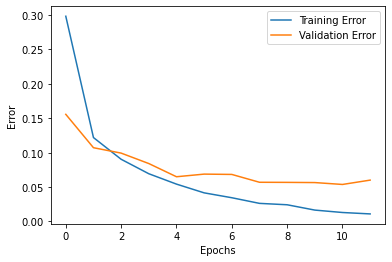

In [82]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error','Validation Error'], loc='upper right')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


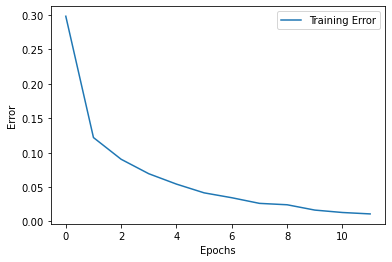

In [84]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error'], loc='upper right')

In [58]:
model.evaluate(X_test_flattened, Y_test)

119/119 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9797


[0.08375180512666702, 0.9797101616859436]

In [59]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([9.9611026e-01, 6.4963996e-03, 9.3713725e-01, 2.0512938e-04,
       9.2652315e-01], dtype=float32)

In [60]:
y_pred = []
for i in y_predicted:
    temp = np.argmax(i)
    if temp == 0:
        y_pred.append(0)
    if temp == 1:
        y_pred.append(2)
    if temp == 2:
        y_pred.append(5)
    if temp == 3:
        y_pred.append(6)
    if temp == 4:
        y_pred.append(7)
        
y_pred[1600]

5

In [61]:
Y_pred = []
for i in y_predicted:
    Y_pred.append(np.argmax(i))


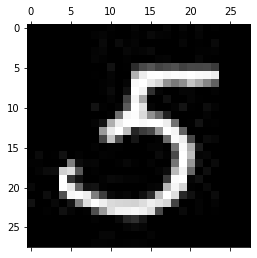

In [62]:
plt.matshow(X_test[1600])

Accuracy: 0.980


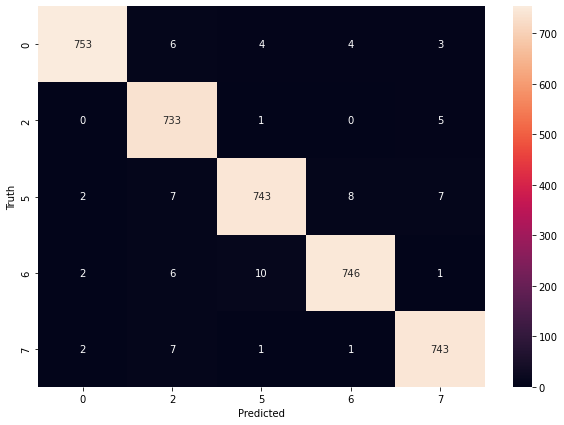

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cm = confusion_matrix(Y_pred,test.classes)
import seaborn as sn
categories = ['0', '2','5','6','7']

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',xticklabels=categories,yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy: %.3f' % accuracy_score(test.classes,Y_pred))


In [15]:
test.classes

array([0, 0, 0, ..., 4, 4, 4])

# Building the model with batch gradient descent algorithm (vanilla gradient descent) :-

In [65]:
opt_bgd = SGD(learning_rate=0.001)
model_bgd = Sequential()
model_bgd.add(Dense(64,activation="relu",input_shape=(28*28*3,)))
model_bgd.add(Dense(128,activation="relu"))
model_bgd.add(Dense(256,activation="relu"))
model_bgd.add(Dense(5,activation="sigmoid"))
model_bgd.compile(optimizer=opt_bgd,loss="categorical_crossentropy",metrics=["accuracy"])
history_bgd = model_bgd.fit(X_train_flattened,Y_train,validation_data=(X_val_flattened,Y_val),callbacks = [callbacks],epochs=1000,batch_size=len(X_train))


Epoch 1/1000
1/1 [==============================] - 1s 855ms/step - loss: 1.6082 - accuracy: 0.2027 - val_loss: 1.6072 - val_accuracy: 0.2150
Epoch 2/1000
1/1 [==============================] - 0s 188ms/step - loss: 1.6077 - accuracy: 0.2042 - val_loss: 1.6067 - val_accuracy: 0.2163
Epoch 3/1000
1/1 [==============================] - 0s 172ms/step - loss: 1.6072 - accuracy: 0.2054 - val_loss: 1.6062 - val_accuracy: 0.2179
Epoch 4/1000
1/1 [==============================] - 0s 202ms/step - loss: 1.6066 - accuracy: 0.2068 - val_loss: 1.6057 - val_accuracy: 0.2192
Epoch 5/1000
1/1 [==============================] - 0s 203ms/step - loss: 1.6061 - accuracy: 0.2078 - val_loss: 1.6051 - val_accuracy: 0.2206
Epoch 6/1000
1/1 [==============================] - 0s 200ms/step - loss: 1.6056 - accuracy: 0.2093 - val_loss: 1.6046 - val_accuracy: 0.2213
Epoch 7/1000
1/1 [==============================] - 0s 198ms/step - loss: 1.6051 - accuracy: 0.2107 - val_loss: 1.6041 - val_accuracy: 0.2229
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


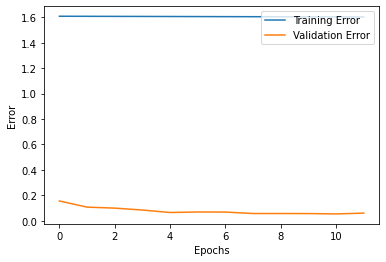

In [85]:
print(history_bgd.history.keys())
plt.plot(history_bgd.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error','Validation Error'], loc='upper right')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


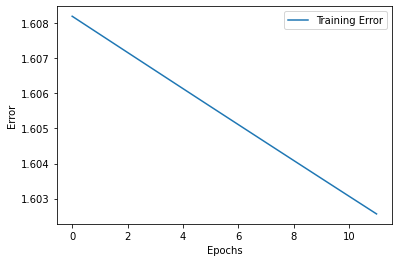

In [66]:
print(history_bgd.history.keys())
plt.plot(history_bgd.history['loss'])
#plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error'], loc='upper right')

In [18]:
model_bgd.evaluate(X_test_flattened, Y_test)

119/119 [==============================] - 0s 1ms/step - loss: 1.6198 - accuracy: 0.1897


[1.6197571754455566, 0.18972331285476685]

In [19]:
y_predicted_bgd = model_bgd.predict(X_test_flattened)
Y_pred_bgd = []
for i in y_predicted_bgd:
    Y_pred_bgd.append(np.argmax(i))

Accuracy: 0.190


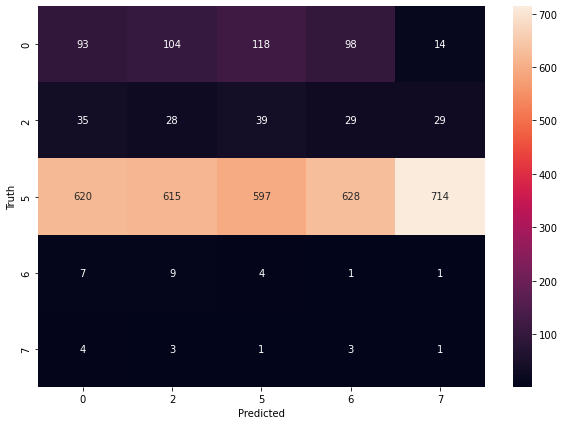

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cm_bgd = confusion_matrix(Y_pred_bgd,test.classes)
import seaborn as sn
categories = ['0', '2','5','6','7']

plt.figure(figsize = (10,7))
sn.heatmap(cm_bgd, annot=True, fmt='d',xticklabels=categories,yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy: %.3f' % accuracy_score(test.classes,Y_pred_bgd))

# Building the model with SGD with momentum (NAG) :-

In [51]:
opt_NAG = SGD(learning_rate=0.001, momentum=0.9)
model_NAG = Sequential()
model_NAG.add(Dense(64,activation="relu",input_shape=(28*28*3,)))
model_NAG.add(Dense(64,activation="relu"))
model_NAG.add(Dense(128,activation="relu"))
model_NAG.add(Dense(5,activation="sigmoid"))
model_NAG.compile(optimizer=opt_NAG,loss="categorical_crossentropy",metrics=["accuracy"])
history_NAG = model_NAG.fit(X_train_flattened,Y_train,validation_data=(X_val_flattened,Y_val),callbacks = [callbacks],epochs=50,batch_size=32)

Epoch 1/50
356/356 [==============================] - 1s 3ms/step - loss: 0.6553 - accuracy: 0.8004 - val_loss: 0.2107 - val_accuracy: 0.9360
Epoch 2/50
356/356 [==============================] - 1s 2ms/step - loss: 0.1748 - accuracy: 0.9469 - val_loss: 0.1517 - val_accuracy: 0.9531
Epoch 3/50
356/356 [==============================] - 1s 2ms/step - loss: 0.1332 - accuracy: 0.9584 - val_loss: 0.1411 - val_accuracy: 0.9539
Epoch 4/50
356/356 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9650 - val_loss: 0.1150 - val_accuracy: 0.9657
Epoch 5/50
356/356 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9687 - val_loss: 0.1063 - val_accuracy: 0.9657
Epoch 6/50
356/356 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9730 - val_loss: 0.0975 - val_accuracy: 0.9705
Epoch 7/50
356/356 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9757 - val_loss: 0.0898 - val_accuracy: 0.9742
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


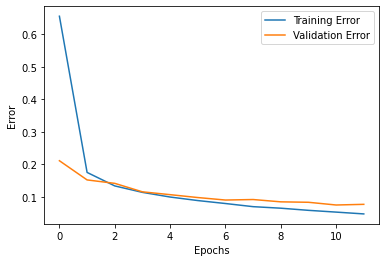

In [86]:
print(history_NAG.history.keys())
plt.plot(history_NAG.history['loss'])
plt.plot(history_NAG.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error','Validation Error'], loc='upper right')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


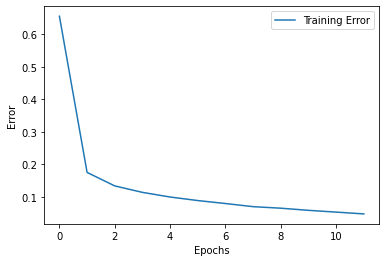

In [68]:
print(history_NAG.history.keys())
plt.plot(history_NAG.history['loss'])
#plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error'], loc='upper right')

In [69]:
model_NAG.evaluate(X_test_flattened, Y_test)

119/119 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9747


[0.09179514646530151, 0.9747035503387451]

In [70]:
y_predicted_NAG = model_NAG.predict(X_test_flattened)
Y_pred_NAG = []
for i in y_predicted_NAG:
    Y_pred_NAG.append(np.argmax(i))

Accuracy: 0.975


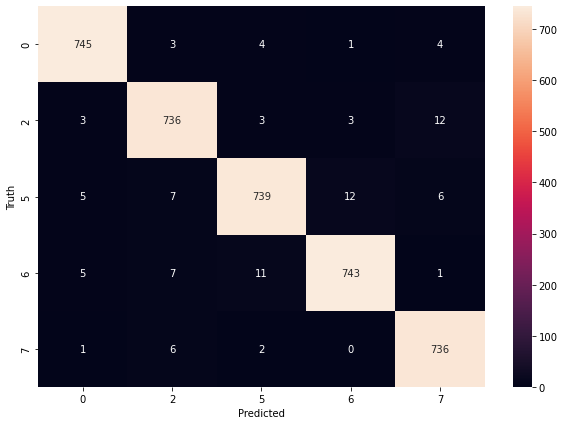

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cm_NAG = confusion_matrix(Y_pred_NAG,test.classes)
import seaborn as sn
categories = ['0', '2','5','6','7']

plt.figure(figsize = (10,7))
sn.heatmap(cm_NAG, annot=True, fmt='d',xticklabels=categories,yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy: %.3f' % accuracy_score(test.classes,Y_pred_NAG))

# Building the model with RMSProp algorithm :-

In [55]:
opt_rms = RMSprop(learning_rate=0.001,rho=0.99, momentum=0.9,centered=False,
     name='RMSprop') 
model_rms = Sequential()
model_rms.add(Dense(128,activation="relu",input_shape=(28*28*3,)))
model_rms.add(Dense(128,activation="relu"))
model_rms.add(Dense(128,activation="relu"))
model_rms.add(Dense(5,activation="sigmoid"))
model_rms.compile(optimizer=opt_rms,loss="categorical_crossentropy",metrics=["accuracy"])
history_rms = model_rms.fit(X_train_flattened,Y_train,validation_data=(X_val_flattened,Y_val),callbacks = [callbacks],epochs=50,batch_size=32)

Epoch 1/50
356/356 [==============================] - 2s 4ms/step - loss: 0.4474 - accuracy: 0.9248 - val_loss: 0.1447 - val_accuracy: 0.9599
Epoch 2/50
356/356 [==============================] - 1s 4ms/step - loss: 0.1384 - accuracy: 0.9628 - val_loss: 0.1555 - val_accuracy: 0.9589
Epoch 3/50
356/356 [==============================] - 1s 4ms/step - loss: 0.1266 - accuracy: 0.9693 - val_loss: 0.1431 - val_accuracy: 0.9652
Epoch 4/50
356/356 [==============================] - 1s 4ms/step - loss: 0.1071 - accuracy: 0.9743 - val_loss: 0.1148 - val_accuracy: 0.9708
Epoch 5/50
356/356 [==============================] - 1s 4ms/step - loss: 0.1092 - accuracy: 0.9753 - val_loss: 0.1148 - val_accuracy: 0.9710
Epoch 6/50
356/356 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9780 - val_loss: 0.0987 - val_accuracy: 0.9697
Epoch 7/50
356/356 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.9807 - val_loss: 0.1545 - val_accuracy: 0.9647
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


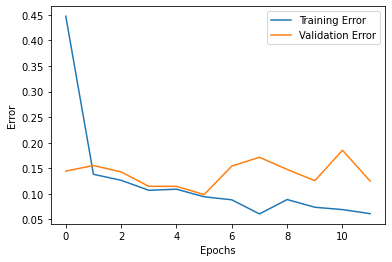

In [87]:
print(history_rms.history.keys())
plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error','Validation Error'], loc='upper right')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


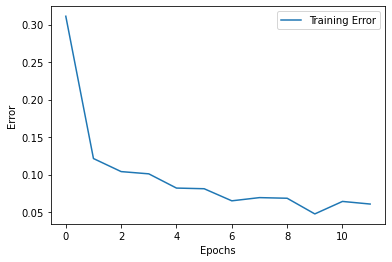

In [42]:
print(history_rms.history.keys())
plt.plot(history_rms.history['loss'])
#plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error'], loc='upper right')

In [72]:
model_rms.evaluate(X_test_flattened, Y_test)

119/119 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9736


[0.23328272998332977, 0.9736495614051819]

In [73]:
y_predicted_rms = model_rms.predict(X_test_flattened)
Y_pred_rms = []
for i in y_predicted_rms:
    Y_pred_rms.append(np.argmax(i))

Accuracy: 0.973


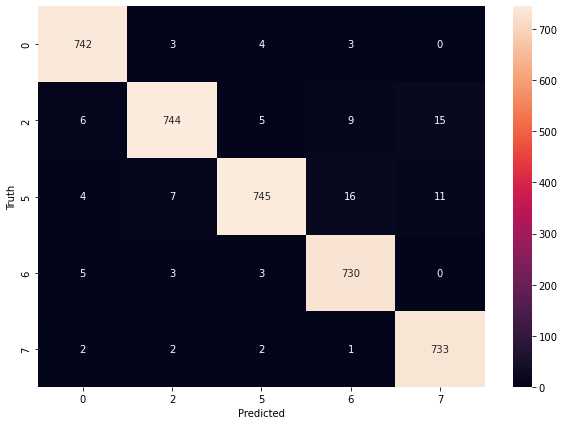

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cm_rms = confusion_matrix(Y_pred_rms,test.classes)
import seaborn as sn
categories = ['0', '2','5','6','7']

plt.figure(figsize = (10,7))
sn.heatmap(cm_rms, annot=True, fmt='d',xticklabels=categories,yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy: %.3f' % accuracy_score(test.classes,Y_pred_rms))

# Building the model with Adam optimizer :-

In [75]:
opt_adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)
model_adam = Sequential()
model_adam.add(Dense(128,activation="relu",input_shape=(28*28*3,)))
model_adam.add(Dense(256,activation="relu"))
model_adam.add(Dense(128,activation="relu"))
model_adam.add(Dense(5,activation="sigmoid"))
model_adam.compile(optimizer=opt_adam,loss="categorical_crossentropy",metrics=["accuracy"])
history_adam = model_adam.fit(X_train_flattened,Y_train,validation_data=(X_val_flattened,Y_val),callbacks = [callbacks],epochs=50,batch_size=32)

Epoch 1/50
356/356 [==============================] - 2s 5ms/step - loss: 0.1657 - accuracy: 0.9491 - val_loss: 0.0884 - val_accuracy: 0.9734
Epoch 2/50
356/356 [==============================] - 2s 4ms/step - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.0725 - val_accuracy: 0.9781
Epoch 3/50
356/356 [==============================] - 2s 4ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 4/50
356/356 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0739 - val_accuracy: 0.9805
Epoch 5/50
356/356 [==============================] - 2s 4ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0652 - val_accuracy: 0.9810
Epoch 6/50
356/356 [==============================] - 2s 4ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 7/50
356/356 [==============================] - 2s 4ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0648 - val_accuracy: 0.9842
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


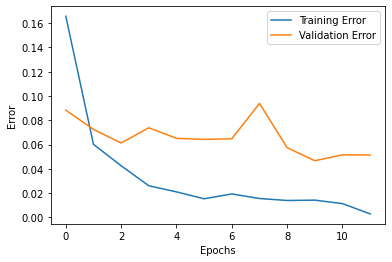

In [88]:
print(history_adam.history.keys())
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error','Validation Error'], loc='upper right')


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


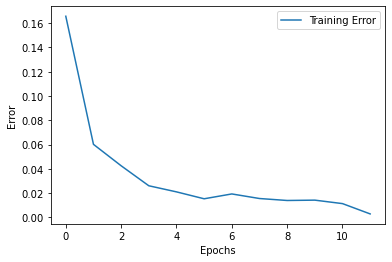

In [77]:
print(history_adam.history.keys())
plt.plot(history_adam.history['loss'])
#plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(['Training Error'], loc='upper right')

In [78]:
model_adam.evaluate(X_test_flattened, Y_test)

119/119 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9847


[0.08828241378068924, 0.9847167134284973]

In [79]:
y_predicted_adam = model_adam.predict(X_test_flattened)
Y_pred_adam = []
for i in y_predicted_adam:
    Y_pred_adam.append(np.argmax(i))

Accuracy: 0.985


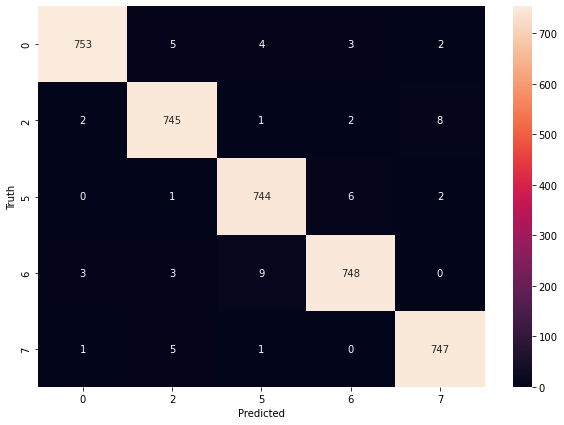

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cm_adam = confusion_matrix(Y_pred_adam,test.classes)
import seaborn as sn
categories = ['0', '2','5','6','7']

plt.figure(figsize = (10,7))
sn.heatmap(cm_adam, annot=True, fmt='d',xticklabels=categories,yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy: %.3f' % accuracy_score(test.classes,Y_pred_adam))